In [1]:
import bias_detection as bd
import pandas as pd

In [2]:
df = pd.read_csv('../data/compas-scores.csv')
df = df[df['c_charge_degree'] != 'O']
df = df[df['is_recid'] != -1]
df = df[abs(df['days_b_screening_arrest'])<=30]

df = df.rename(columns={'is_recid':'label_value'})
df.loc[df['score_text'] == 'Low', 'score'] = str(0.0)
df.loc[df['score_text'] != 'Low', 'score'] = str(1.0)

df = df[['score', 'label_value', 'race', 'sex', 'age_cat']]
df.head()

,score,label_value,race,sex,age_cat
0,0.0,0,Other,Male,Greater than 45
2,0.0,1,African-American,Male,25 - 45
3,0.0,1,African-American,Male,Less than 25
6,0.0,0,Other,Male,25 - 45
7,1.0,1,Caucasian,Male,25 - 45


In [3]:
x = bd.BiasDetection(df)

In [4]:
import pprint

res = x.check_dataset_bias()

pp = pprint.PrettyPrinter(indent=2)
pp.pprint(res)

{ 'details': { 'age_cat': { 'fair': False,
                            'ratios': { '25 - 45': 0.34594594594594597,
                                        'Greater than 45': 0.23882820258192652,
                                        'Less than 25': 0.42309606769537084}},
               'race': { 'fair': False,
                         'ratios': { 'African-American': 0.4047517123287671,
                                     'Asian': 0.20833333333333334,
                                     'Caucasian': 0.2858899477405472,
                                     'Hispanic': 0.25458996328029376,
                                     'Native American': 0.2962962962962963,
                                     'Other': 0.24518388791593695}},
               'sex': { 'fair': True,
                        'ratios': { 'Female': 0.24676668391101914,
                                    'Male': 0.36351441985244803}}},
  'fair': False}


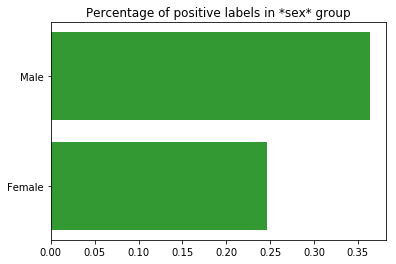

In [5]:
x.plot_dataset_bias(res, 'sex')

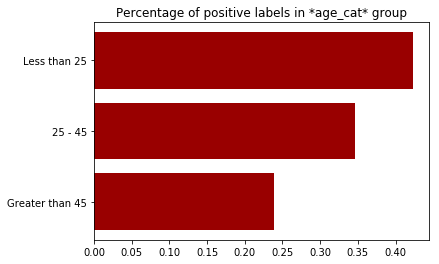

In [6]:
x.plot_dataset_bias(res, 'age_cat')

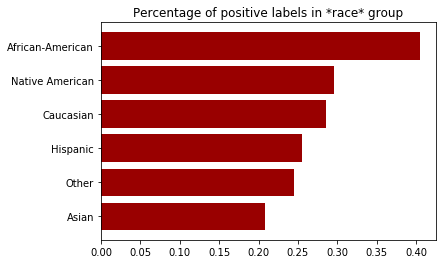

In [7]:
x.plot_dataset_bias(res, 'race')

In [8]:
x.get_model_fairness(level='model')

model_id, score_thresholds 1 {'rank_abs': [4021]}
get_disparity_major_group()


{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}

In [9]:
x.get_model_fairness(level='attribute')

model_id, score_thresholds 1 {'rank_abs': [4021]}
get_disparity_major_group()


,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,1,binary 0/1,age_cat,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False
1,1,binary 0/1,race,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False
2,1,binary 0/1,sex,False,True,False,True,False,True,True,True,True,False,False,False,True,False,False


In [10]:
x.get_model_fairness(level='value')

model_id, score_thresholds 1 {'rank_abs': [4021]}
get_disparity_major_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,1,binary 0/1,4021,race,African-American,0.703860,0.526789,0.276543,0.497167,0.473211,...,True,True,True,True,True,True,True,True,True,True
1,1,binary 0/1,4021,race,Asian,0.600000,0.868421,0.108108,0.454545,0.131579,...,False,True,False,True,True,False,False,False,False,False
2,1,binary 0/1,4021,race,Caucasian,0.489247,0.752906,0.213579,0.557823,0.247094,...,False,False,False,True,True,False,False,False,False,False
3,1,binary 0/1,4021,race,Hispanic,0.432692,0.799672,0.195041,0.575472,0.200328,...,False,False,False,True,True,False,False,False,False,False
4,1,binary 0/1,4021,race,Native American,0.750000,0.736842,0.125000,0.454545,0.263158,...,True,True,False,True,True,False,False,False,False,False
5,1,binary 0/1,4021,race,Other,0.342857,0.853828,0.200000,0.567568,0.146172,...,False,False,False,True,True,False,False,False,False,False
6,1,binary 0/1,4021,sex,Female,0.584906,0.671016,0.168511,0.631926,0.328984,...,True,True,True,True,False,False,False,True,False,False
7,1,binary 0/1,4021,sex,Male,0.611439,0.661538,0.251193,0.492185,0.338462,...,True,True,True,True,True,True,True,True,True,True
8,1,binary 0/1,4021,age_cat,25 - 45,0.608297,0.661157,0.238595,0.512942,0.338843,...,True,True,True,True,True,True,True,True,True,True
9,1,binary 0/1,4021,age_cat,Greater than 45,0.397089,0.833659,0.184949,0.571749,0.166341,...,False,False,False,True,True,False,False,False,False,False


model_id, score_thresholds 1 {'rank_abs': [4021]}
get_disparity_major_group()


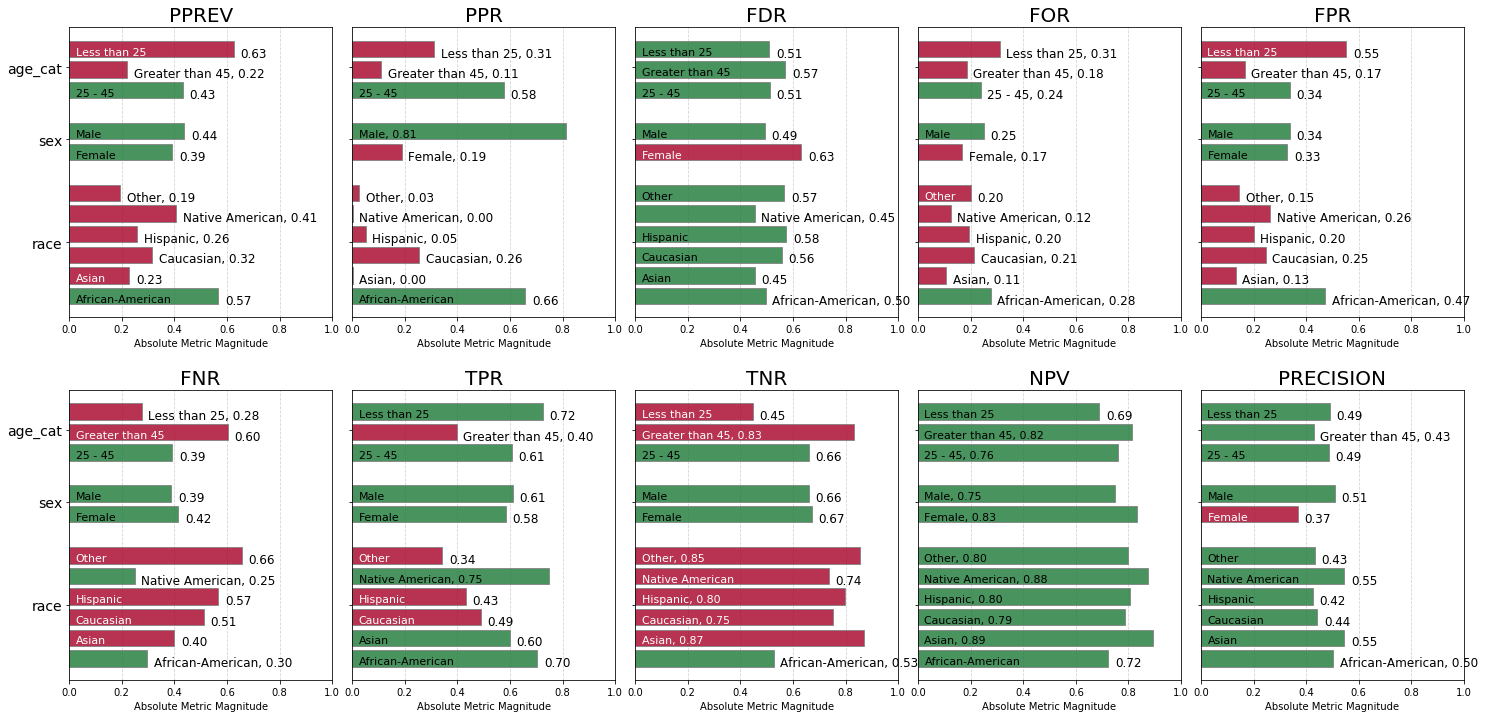

In [11]:
q = x.plot_fairness(is_absolute=True)

model_id, score_thresholds 1 {'rank_abs': [4021]}
get_disparity_major_group()


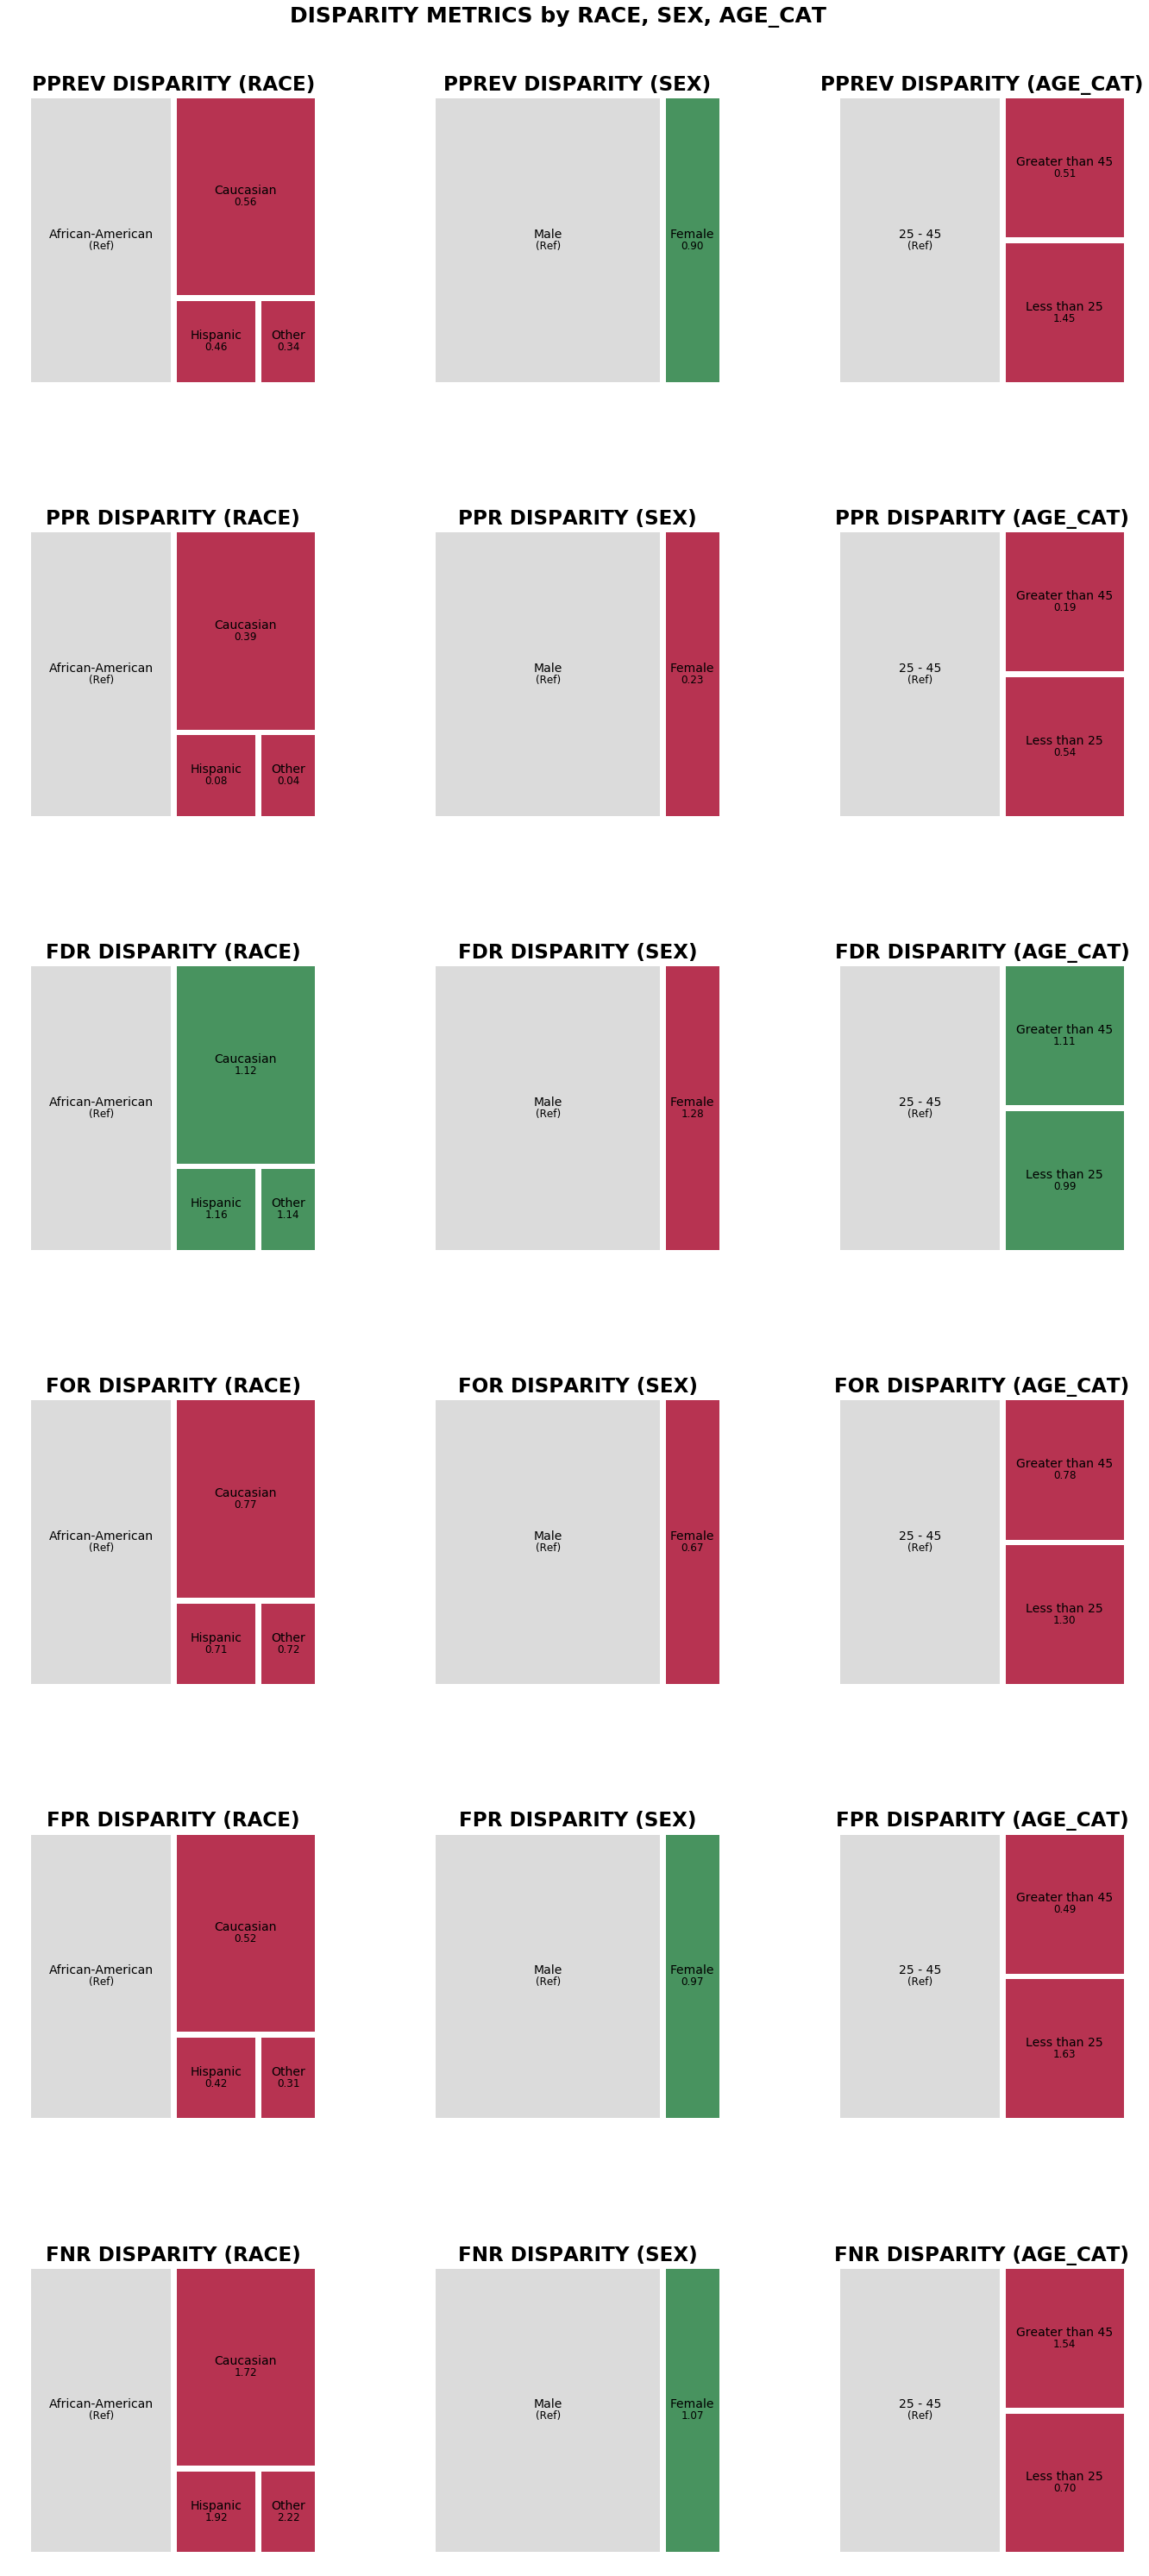

In [12]:
q = x.plot_fairness(is_absolute=False)